Keras Classification - EDA and Preprocessing

To perform a classification task with TensorFlow.

To identify and deal with overfitting through Early Stopping Callbacks and Dropout Layers.

Early Stopping
- Keras can automatically stop trainign based on a loss codition on the validation data passed during the model.fit() call.

Dropout Layers
- Dropout can be added to layers to "turn off" neurons during training to prevent overfitting.
- Each Dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


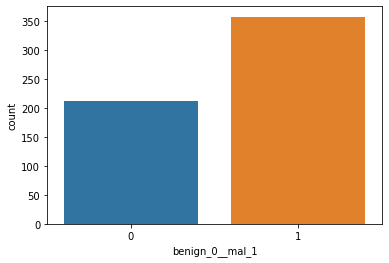

In [10]:
sns.countplot(x='benign_0__mal_1', data=df)

In [11]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


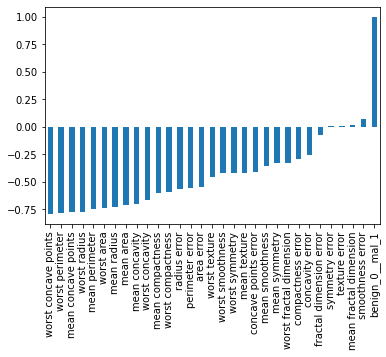

In [12]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

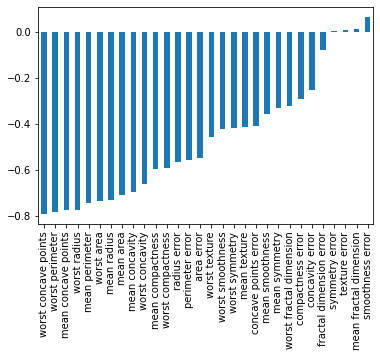

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<Figure size 864x864 with 0 Axes>

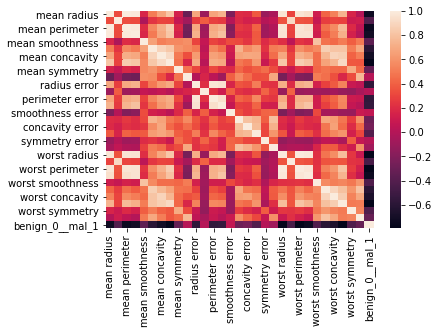

<Figure size 864x864 with 0 Axes>

In [15]:
sns.heatmap(df.corr())

plt.figure(figsize=(12,12))

In [16]:
X= df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import (train_test_split)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

Dealing with Overfitting and Evaluation


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
X_train.shape

(426, 30)

In [31]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer ='adam')

In [33]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6661 - val_loss: 0.6501
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6349 - val_loss: 0.6210
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6064 - val_loss: 0.5907
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5755 - val_loss: 0.5568
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5384 - val_loss: 0.5143
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4954 - val_loss: 0.4697
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4514 - val_loss: 0.4239
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4059 - val_loss: 0.3793
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3640 - val_loss: 0.3346
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3272 - val_loss: 0.2980
Epoch 11

In [34]:
model.history.history

{'loss': [0.6660645604133606,
  0.6349473595619202,
  0.6063601970672607,
  0.5755226016044617,
  0.5384145975112915,
  0.49539437890052795,
  0.4514085054397583,
  0.4059484302997589,
  0.36397138237953186,
  0.32724618911743164,
  0.2929600775241852,
  0.26763466000556946,
  0.2466505914926529,
  0.22709497809410095,
  0.21562817692756653,
  0.1972941905260086,
  0.18539340794086456,
  0.17733463644981384,
  0.16877682507038116,
  0.16075190901756287,
  0.15361148118972778,
  0.14973101019859314,
  0.1381514072418213,
  0.13301385939121246,
  0.1282966136932373,
  0.12576305866241455,
  0.11764717102050781,
  0.11217879503965378,
  0.11048223823308945,
  0.11131055653095245,
  0.10752862691879272,
  0.09833130240440369,
  0.09738300740718842,
  0.09494622051715851,
  0.09146680682897568,
  0.09049277007579803,
  0.08869489282369614,
  0.08544040471315384,
  0.08465444296598434,
  0.08386879414319992,
  0.08885769546031952,
  0.07972963899374008,
  0.07614514231681824,
  0.07598244398

In [35]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.666065,0.650094
1,0.634947,0.621036
2,0.606360,0.590676
3,0.575523,0.556821
4,0.538415,0.514344
...,...,...
595,0.029955,0.252767
596,0.035670,0.238907
597,0.027786,0.257643
598,0.027715,0.252732


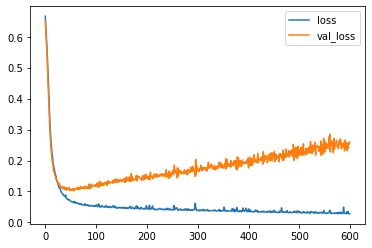

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [38]:
# Call Backs

model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer ='adam')

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
# help(EarlyStopping)

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=25)

In [43]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6806 - val_loss: 0.6609
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6489 - val_loss: 0.6323
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6178 - val_loss: 0.5968
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5738 - val_loss: 0.5414
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5153 - val_loss: 0.4842
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4621 - val_loss: 0.4308
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4145 - val_loss: 0.3879
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3714 - val_loss: 0.3419
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3345 - val_loss: 0.3094
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3043 - val_loss: 0.2791
Epoch 11/

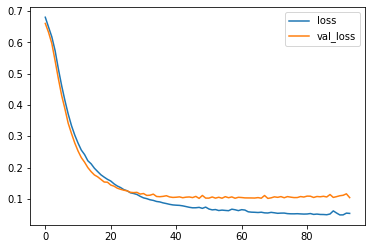

In [44]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))                    # Turn off a percentage of layer

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) 

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer ='adam')

In [47]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7102 - val_loss: 0.7035
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7074 - val_loss: 0.6874
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6929 - val_loss: 0.6759
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6863 - val_loss: 0.6689
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6630 - val_loss: 0.6557
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6522 - val_loss: 0.6351
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6395 - val_loss: 0.6151
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6359 - val_loss: 0.6011
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6082 - val_loss: 0.5859
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5972 - val_loss: 0.5642
Epoch 11/

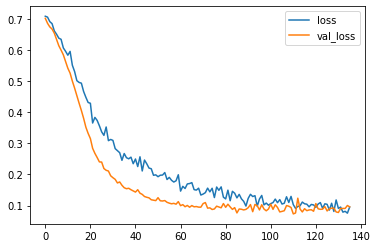

In [48]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()


In [49]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [50]:
predictions = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.99      0.93      0.96        88

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [53]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 6 82]]
